# **가위바위보 분류기 만들기**

## 0. 설계

**1. MNIST 손글씨 분류기를 본 따 가위바위보 분류기를 만들어 보려고 한다.**

 *  데이터가 없기 때문에 나의 손을 이용해서 데이터를 만들고 팀원들의 데이터도 가져와  데이터셋을 구성한다.
 *  총 3개의 데이터셋이 필요함(가위,바위,보)
 *  테스트용 데이터도 가져온 다음 정확도를 측정

**2. 데이터 전처리**

 *  데이터를 보고 이상치에 대한 처리를 진행한다.
 *  불필요한 데이터를 삭제하고 필요 데이터가 있다면 추가해준다.

**3. 모델링과 하이퍼 파라미터 튜닝**

 * Conv와 Pooling,Dense 값을 줘서 모델링 한 후 파라미터 값을 조정함
 * 정확도를 측정하여 추가 파라미터 값 조정



## 1.데이터를 불러 온후, resize

In [2]:
#PIL 라이브러리 불러오기
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


**처음 이미지가 244x244이기 때문에 28x28로 resize를 시켜준다**

In [3]:
#가위 이미지 사이즈 변경(28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [4]:
#바위 이미지 사이즈 변경(28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [5]:
#보 이미지 사이즈 변경(28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


**데이터를 읽을 수 있는 load_data()함수로 데이터 불러오기**

number_of_data : 데이터(이미지) 개수 총합

color : RGB값(컬러기 때문에 3, 흑백이면 1)

x_train_norm = x_train/255.0을 통해 정규화를 시켜줌 : 0~1 값

In [6]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    #라벨링 -> 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


### **인덱스가 0이기 때문에 가위에 대한 이미지가 도출**

**index[0] : 가위, index[1]: 바위, index[2] : 보**

라벨:  0


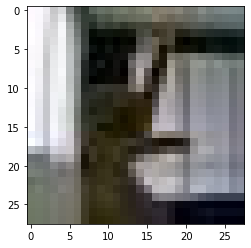

In [7]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 2.네트워크 설계

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1 = 16
n_channel_2 = 32
n_dense = 64
n_train_epoch = 10


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu')) 
model.add(keras.layers.Dense(3, activation = 'softmax')) #가위,바위,보 3개니까 3

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1



**n_channel_1** : 다양한 이미지의 특징을 살펴볼 수 있는 값

**n_channel_2** : 다양한 이미지의 특징을 살펴볼 수 있는 값

**n_dense** : 분류기 알고리즘의 복잡함을 나타내는 값(복잡한 문제일 수록 높이는게 좋음)

**n_train_epoch** : 학습을 얼마나 반복할 건지


**softmax의 3의 의미는 최종 분류기의 class 수로서 가위,바위,보 총 3개를 분류해야 하기에 3이라는 숫자를 씀**


## 3.네트워크 학습

In [9]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = n_train_epoch) #10번반복

Epoch 1/10
10/10 [==============================] - 1s 20ms/step - loss: 1.0830 - accuracy: 0.3933
Epoch 2/10
10/10 [==============================] - 0s 20ms/step - loss: 0.9845 - accuracy: 0.6167
Epoch 3/10
10/10 [==============================] - 0s 21ms/step - loss: 0.8799 - accuracy: 0.6167
Epoch 4/10
10/10 [==============================] - 0s 21ms/step - loss: 0.7666 - accuracy: 0.7133
Epoch 5/10
10/10 [==============================] - 0s 21ms/step - loss: 0.6353 - accuracy: 0.7567
Epoch 6/10
10/10 [==============================] - 0s 20ms/step - loss: 0.5449 - accuracy: 0.8133
Epoch 7/10
10/10 [==============================] - 0s 19ms/step - loss: 0.4707 - accuracy: 0.8500
Epoch 8/10
10/10 [==============================] - 0s 20ms/step - loss: 0.3838 - accuracy: 0.8900
Epoch 9/10
10/10 [==============================] - 0s 20ms/step - loss: 0.3197 - accuracy: 0.9100
Epoch 10/10
10/10 [==============================] - 0s 20ms/step - loss: 0.3215 - accuracy: 0.8900


## 4.성능 평가 테스트

In [10]:
#샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/testset1/scissor"
resize_images(image_dir_path)  

print("가위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 샘플 이미지 resize 완료!


In [11]:
#샘플 보 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/testset1/paper"
resize_images(image_dir_path)

print("보 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 샘플 이미지 resize 완료!


In [12]:
#샘플 바위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/testset1/rock"
resize_images(image_dir_path)

print("바위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 샘플 이미지 resize 완료!


In [13]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/testset1"
(x_test, y_test)=load_data(image_dir_path, 300) #x_test,y_test만들기
x_test_norm = x_test/255.0 

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


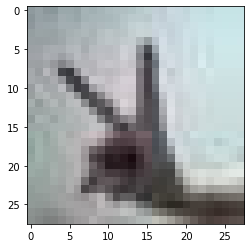

In [14]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_test_norm[0])
print('라벨: ', y_test[0])


In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 256.8306 - accuracy: 0.5133
test_loss : 256.83062744140625
test_accuracy : 0.5133333206176758


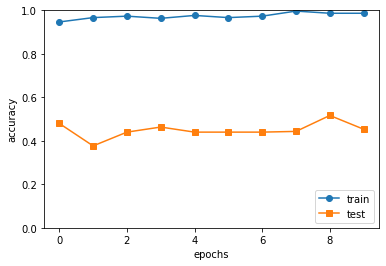

In [16]:
train_accuracy = []
test_accuracy = []

for epoch in range(n_train_epoch):
    # 모델을 한 에폭동안 훈련
    model.fit(x_train_norm, y_train, epochs=1, verbose=0)
    
    # 훈련 데이터와 테스트 데이터에 대해 모델을 평가하여 정확도 저장
    train_loss, train_acc = model.evaluate(x_train_norm, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=0)
    
    # 정확도 값을 리스트에 추가
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# 훈련 및 테스트 데이터에 대한 정확도를 에폭별로 시각화
markers = {'train': 'o', 'test': 's'}
x = np.arange(n_train_epoch)

plt.plot(x, train_accuracy, marker='o', label='train', markevery=1)
plt.plot(x, test_accuracy, marker='s', label='test', markevery=1)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### **테스트 데이터로 성능 평가후 시각화를 시켜보니 처참한 결과가 나오게 되었다**

### **train 데이터의 오버피팅으로 인해 test 데이터의 정확도가 50%안팎이 나오게 되었다.**

**몇번 다시 돌려보면 최대 60%까지 뛰기도 하나 대부분 37%~45%이므로 파라미터 조정과 데이터를 추가 시키고 리사이즈의 크기를 키워 보기로 하자**

## **1.데이터 불러오기, resize**

In [17]:
#PIL 라이브러리 불러오기
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!") 

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 122사이즈로 바꾸어 저장
    target_size=(122,122)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
image_dir_path1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor1"
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor2"
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor3"
image_dir_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor4"
resize_images(image_dir_path)
resize_images(image_dir_path1)
resize_images(image_dir_path2)
resize_images(image_dir_path3)
resize_images(image_dir_path4)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
image_dir_path1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock1"
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock2"
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock3"
image_dir_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock4"
resize_images(image_dir_path)
resize_images(image_dir_path1)
resize_images(image_dir_path2)
resize_images(image_dir_path3)
resize_images(image_dir_path4)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
image_dir_path1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper1"
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper2"
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper3"
image_dir_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper4"
resize_images(image_dir_path)
resize_images(image_dir_path1)
resize_images(image_dir_path2)
resize_images(image_dir_path3)
resize_images(image_dir_path4)
print("보 이미지 resize 완료!")

PIL 라이브러리 import 완료!
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
112  images to be resized.
112  images resized.
112  images to be resized.
112  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
101  images to be resized.
101  images resized.
118  images to be resized.
118  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
105  images to be resized.
105  images resized.
109  images to be resized.
109  images resized.
보 이미지 resize 완료!


### **이미지를 122x122로 리사이즈 시켰다**

In [18]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
import numpy as np

def load_data(img_path, number_of_data=1557):  # 가위바위보 이미지 개수 총합에 주의하세요.
    #라벨링 -> 가위 : 0, 바위 : 1, 보 : 2
    img_size=122
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/scissor1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/scissor2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/scissor3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1 
        
    for file in glob.iglob(img_path+'/scissor4/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/rock1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
        
    for file in glob.iglob(img_path+'/rock2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
        
    for file in glob.iglob(img_path+'/rock3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/rock4/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1 
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper4/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1557 입니다.
x_train shape: (1557, 122, 122, 3)
y_train shape: (1557,)


### **또한 많은 데이터를 트레인에 집어넣어 오피피팅이 덜 날 수 있도록 하였다**

라벨:  0


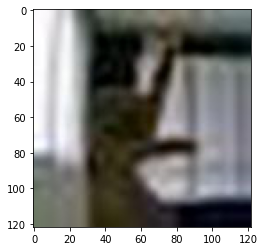

In [19]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## **2.네트워크 설계**

In [20]:
n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 10


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation = 'relu', input_shape=(122, 122, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu')) 
model.add(keras.layers.Dense(3, activation = 'softmax')) #가위,바위,보 3개니까 3

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 120, 120, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                861216    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

**입력을 28x28에서 122x122로 바꿔주었다.**

## **3.네트워크 학습**

In [21]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = n_train_epoch ) #10번반복

Epoch 1/10
49/49 [==============================] - 22s 448ms/step - loss: 1.0233 - accuracy: 0.5466
Epoch 2/10
49/49 [==============================] - 22s 450ms/step - loss: 0.4623 - accuracy: 0.8035
Epoch 3/10
49/49 [==============================] - 22s 454ms/step - loss: 0.2642 - accuracy: 0.9075
Epoch 4/10
49/49 [==============================] - 22s 456ms/step - loss: 0.1527 - accuracy: 0.9570
Epoch 5/10
49/49 [==============================] - 22s 454ms/step - loss: 0.0863 - accuracy: 0.9788
Epoch 6/10
49/49 [==============================] - 22s 457ms/step - loss: 0.0613 - accuracy: 0.9852
Epoch 7/10
49/49 [==============================] - 22s 455ms/step - loss: 0.0418 - accuracy: 0.9917
Epoch 8/10
49/49 [==============================] - 22s 453ms/step - loss: 0.0221 - accuracy: 0.9968
Epoch 9/10
49/49 [==============================] - 22s 456ms/step - loss: 0.0212 - accuracy: 0.9968
Epoch 10/10
49/49 [==============================] - 22s 454ms/step - loss: 0.0093 - accura

## **4.성능 평가 테스트**

In [22]:
#샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/testset1/scissor"
resize_images(image_dir_path)  

print("가위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 샘플 이미지 resize 완료!


In [23]:
#샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/testset1/rock"
resize_images(image_dir_path)  

print("바위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 샘플 이미지 resize 완료!


In [24]:
#샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/testset1/paper"
resize_images(image_dir_path)  

print("보 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 샘플 이미지 resize 완료!


In [25]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/testset1"
(x_test, y_test)=load_data(image_dir_path, 300) #x_test,y_test만들기
x_test_norm = x_test/255.0 

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 122, 122, 3)
y_test shape: (300,)


라벨:  0


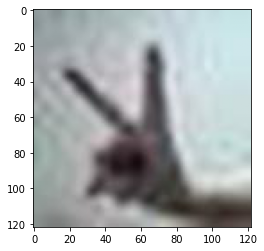

In [26]:
import matplotlib.pyplot as plt

plt.imshow(x_test_norm[0])
print('라벨: ', y_test[0])

In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 1s - loss: 154.1827 - accuracy: 0.7400
test_loss : 154.18267822265625
test_accuracy : 0.7400000095367432


**resize를 올리고 데이터를 약 1200개 정도 올렸더니 정확도가 74%로 많이 오른 것을 볼 수 있다**

**시각화를 하려고 했지만 계속해서 커널이 죽는 바람에 시각화를 시키지 못했다.**

# 3.회고

일단 처음으로 딥러닝을 접해보게 되었는데 생각보다 정확도 높이는 것이 정말 어렵다는 것을 알게 되었다.

일단 트레인 데이터가 많이 없던 것도 한몫을 하겠지만 정말 많이 설정을 바꾸고 돌리지 않는다면 웬만하면 정확도가 오르지 않는것을 보고 정말 어렵겠다고 생각했던 것 같다.

시간이 더 있었다면 계속해서 돌려보며 정확도를 높였겠지만 오늘 조퇴를 해야하기에 다 조절하지 못하고 가 아쉽다는 생각이 들었고 그래도 내 힘으로 딥러닝 프로젝트를 해봤다는 것에 재밌다는 생각 또한 들었다.